In [1]:
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [3]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[0]
    L = -(1/m) * L_sum

    return L

In [4]:
iris = load_iris()

X = iris.data
y = iris.target

In [5]:
X,y = shuffle(X,y)

In [6]:
digits = 3
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [7]:
m = 120
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [8]:
def train(learning_rate = 0.1, epochs = 2000):
    
    n_x = X_train.shape[0]
    n_h = 64

    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(digits, n_h)
    b2 = np.zeros((digits, 1))

    X = X_train
    Y = Y_train

    for i in range(epochs):

        Z1 = np.matmul(W1,X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2,A1) + b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

        cost = compute_multiclass_loss(Y, A2)

        dZ2 = A2-Y
        dW2 = (1./m) * np.matmul(dZ2, A1.T)
        db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        dW1 = (1./m) * np.matmul(dZ1, X.T)
        db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

        if (i % 100 == 0):
            print("Epoch", i, "cost: ", cost)

    print("Final cost:", cost)
    
    Z1 = np.matmul(W1, X_test) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    predictions = np.argmax(A2, axis=0)
    labels = np.argmax(Y_test, axis=0)
    
    cf_matrix = confusion_matrix(predictions, labels)
    
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [10,5]
    label = list(iris.target_names)
    df_cm = pd.DataFrame(cf_matrix, label, label)
    sn.set(font_scale=1)
    sn.heatmap(df_cm, annot=True, annot_kws={"size":16})
    plt.show()
    
    print(classification_report(predictions, labels))
    
    return cost

Epoch 0 cost:  179.46415903245276
Epoch 100 cost:  7.841611155766224
Epoch 200 cost:  6.517747903883593
Epoch 300 cost:  5.829459262813259
Epoch 400 cost:  5.319122993488872
Epoch 500 cost:  4.8694214913741405
Epoch 600 cost:  4.532778071649286
Epoch 700 cost:  4.278678785686965
Epoch 800 cost:  4.065151454299583
Epoch 900 cost:  3.880676933075973
Epoch 1000 cost:  3.719493537365884
Epoch 1100 cost:  3.577618754903425
Epoch 1200 cost:  3.452015232593288
Epoch 1300 cost:  3.340272609002172
Epoch 1400 cost:  3.240434918503163
Epoch 1500 cost:  3.150889042999696
Epoch 1600 cost:  3.0702859770517628
Epoch 1700 cost:  2.9974835042250083
Epoch 1800 cost:  2.931504590486853
Epoch 1900 cost:  2.871507303922307
Final cost: 2.817286240746922


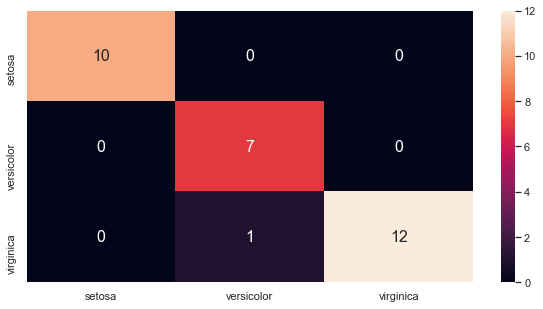

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Epoch 0 cost:  208.90327820145995
Epoch 100 cost:  7.430679906323455
Epoch 200 cost:  4.138717705351518
Epoch 300 cost:  3.5393676562451084
Epoch 400 cost:  3.178674929675627
Epoch 500 cost:  2.9497966203228807
Epoch 600 cost:  2.7872361086883677
Epoch 700 cost:  2.665330911012063
Epoch 800 cost:  2.570196777196827
Epoch 900 cost:  2.493526048324006
Epoch 1000 cost:  2.430035832577451
Epoch 1100 cost:  2.3762231069983617
Epoch 1200 cost:  2.329682647109837
Epoch 1300 cost:  2.2887101216615897
Epoch 1400 cost:  2.2520721446237806
Epoch 1500 cost:  2.2188908754828773
Epoch 1600 cost:  2.188617840514441
Epoch 1700 

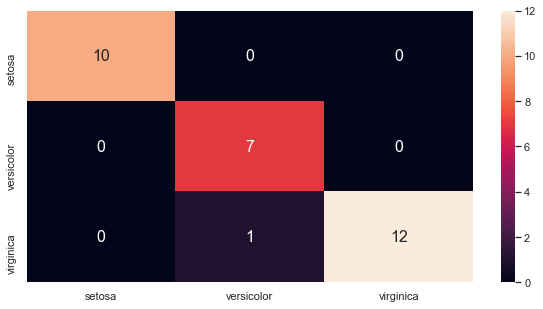

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Epoch 0 cost:  170.11673427115056
Epoch 100 cost:  21.41528212360359
Epoch 200 cost:  3.870085467639603
Epoch 300 cost:  3.3452860611657123
Epoch 400 cost:  3.3445147563100583
Epoch 500 cost:  2.8723223107573315
Epoch 600 cost:  2.72489905905316
Epoch 700 cost:  2.638197285131485
Epoch 800 cost:  2.6383109261982494
Epoch 900 cost:  2.508421304818477
Epoch 1000 cost:  2.454088491715502
Epoch 1100 cost:  2.4158962968483917
Epoch 1200 cost:  2.374094015796502
Epoch 1300 cost:  2.3512376360281046
Epoch 1400 cost:  2.329205101096199
Epoch 1500 cost:  2.301591079601314
Epoch 1600 cost:  2.278342313773745
Epoch 1700 co

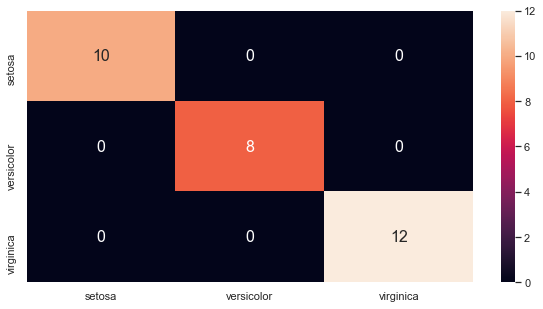

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Epoch 0 cost:  215.65554998215012
Epoch 100 cost:  37.446874985894254
Epoch 200 cost:  32.185511474530664
Epoch 300 cost:  7.407036490250239
Epoch 400 cost:  2.765142175193884
Epoch 500 cost:  2.600294872973171
Epoch 600 cost:  2.496732060931272
Epoch 700 cost:  2.4184910660586274
Epoch 800 cost:  2.3543101766164547
Epoch 900 cost:  2.2925895768915083
Epoch 1000 cost:  2.203332936555232
Epoch 1100 cost:  2.158326976134484
Epoch 1200 cost:  2.1271567484074994
Epoch 1300 cost:  2.099986993429427
Epoch 1400 cost:  2.0755420828866695
Epoch 1500 cost:  2.053215003592465
Epoch 1600 cost:  2.0326968558220586
Epoch 1700

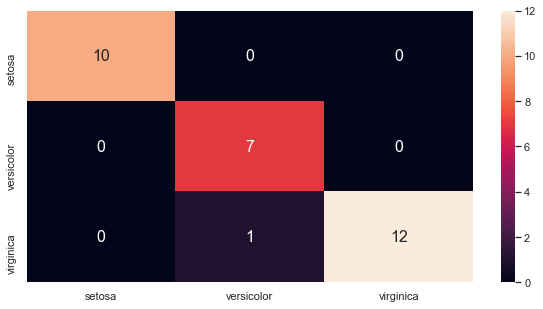

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Epoch 0 cost:  62.74173372069596
Epoch 100 cost:  36.617560475745805
Epoch 200 cost:  34.95120850100287
Epoch 300 cost:  2.652966256668732
Epoch 400 cost:  2.3553250589713106
Epoch 500 cost:  2.2459702253038953
Epoch 600 cost:  2.1600723382401372
Epoch 700 cost:  2.105886478469977
Epoch 800 cost:  2.0650034316076025
Epoch 900 cost:  2.0319563411105706
Epoch 1000 cost:  2.0049118827280727
Epoch 1100 cost:  1.9816730743385353
Epoch 1200 cost:  1.960950564223714
Epoch 1300 cost:  2.4711991472929578
Epoch 1400 cost:  1.9877132410038048
Epoch 1500 cost:  1.9788777451358204
Epoch 1600 cost:  1.9694263232962124
Epoch 1

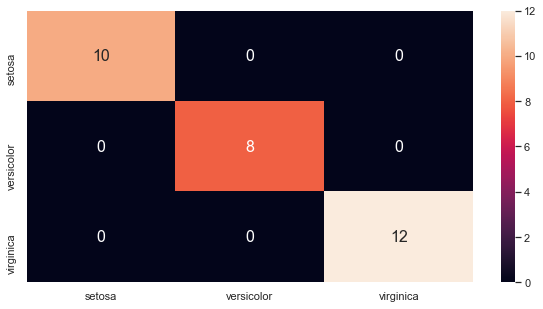

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Epoch 0 cost:  85.07867198710639
Epoch 100 cost:  45.73362034637859
Epoch 200 cost:  12.241468098370932
Epoch 300 cost:  2.5264035099631794
Epoch 400 cost:  2.4802317185832656
Epoch 500 cost:  2.2961029244434448
Epoch 600 cost:  2.2252645942029674
Epoch 700 cost:  2.178858930472833
Epoch 800 cost:  2.1417476638393755
Epoch 900 cost:  2.1101072002701664
Epoch 1000 cost:  2.082255940198187
Epoch 1100 cost:  2.8294911119469193
Epoch 1200 cost:  2.0991639639061397
Epoch 1300 cost:  2.091446708481174
Epoch 1400 cost:  2.098865408451688
Epoch 1500 cost:  2.0840170561373217
Epoch 1600 cost:  2.0643731565081005
Epoch 17

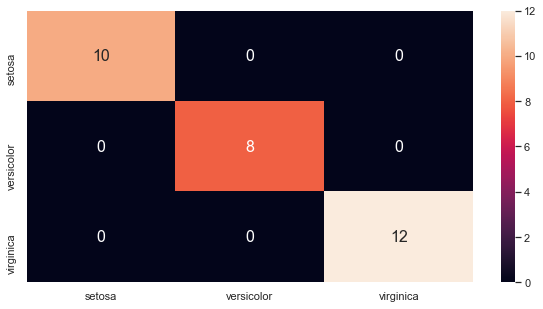

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Epoch 0 cost:  314.87482309671293
Epoch 100 cost:  117.23450468967292
Epoch 200 cost:  96.10629256944657
Epoch 300 cost:  79.02055276141635
Epoch 400 cost:  2.3108262087487703
Epoch 500 cost:  2.176729665176471
Epoch 600 cost:  2.1132015037316494
Epoch 700 cost:  2.0618793125001162
Epoch 800 cost:  2.0194190253864983
Epoch 900 cost:  1.9816029128854828
Epoch 1000 cost:  1.9300269608570917
Epoch 1100 cost:  1.8638197620307004
Epoch 1200 cost:  1.8378047330183542
Epoch 1300 cost:  1.8150608235162649
Epoch 1400 cost:  1.9078829262662318
Epoch 1500 cost:  1.883750758417029
Epoch 1600 cost:  1.8661602636383963
Epoch 

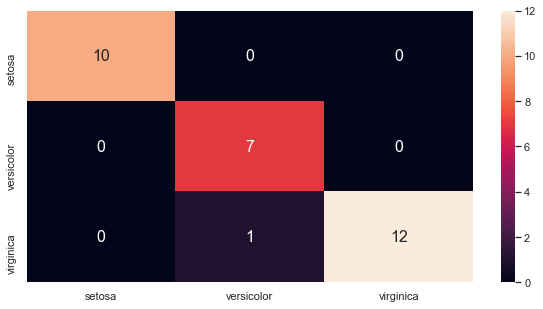

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Epoch 0 cost:  223.92546334450915
Epoch 100 cost:  40.746792224300435
Epoch 200 cost:  47.30312526254771
Epoch 300 cost:  61.54741224806546
Epoch 400 cost:  2.521895048824393
Epoch 500 cost:  2.3590084612674587
Epoch 600 cost:  2.282903526359291
Epoch 700 cost:  2.2252740559881823
Epoch 800 cost:  2.1760257816223127
Epoch 900 cost:  2.129503073935676
Epoch 1000 cost:  2.073312675680368
Epoch 1100 cost:  2.0182096971673036
Epoch 1200 cost:  1.9834179010966768
Epoch 1300 cost:  1.9443770500871587
Epoch 1400 cost:  2.3818553786943655
Epoch 1500 cost:  2.061265643993149
Epoch 1600 cost:  2.0457094477561384
Epoch 170

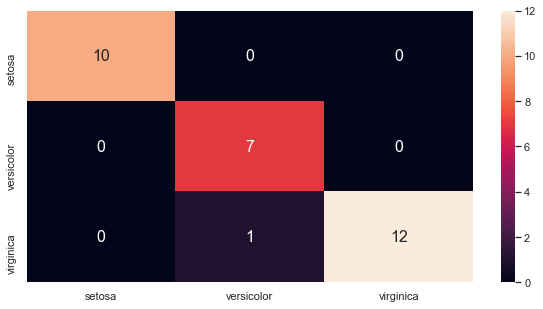

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Epoch 0 cost:  180.40943975014625
Epoch 100 cost:  48.24453249088919
Epoch 200 cost:  46.24292711096147
Epoch 300 cost:  49.27753729774025
Epoch 400 cost:  2.456858107547948
Epoch 500 cost:  2.251943261992536
Epoch 600 cost:  2.176898187059823
Epoch 700 cost:  2.311081859850259
Epoch 800 cost:  2.2767014428043137
Epoch 900 cost:  2.2445566625018625
Epoch 1000 cost:  2.2150345209078157
Epoch 1100 cost:  2.189530441111196
Epoch 1200 cost:  2.1691684190665317
Epoch 1300 cost:  2.150553458032096
Epoch 1400 cost:  2.1312615783386795
Epoch 1500 cost:  2.111483677505012
Epoch 1600 cost:  2.091678483483548
Epoch 1700 co

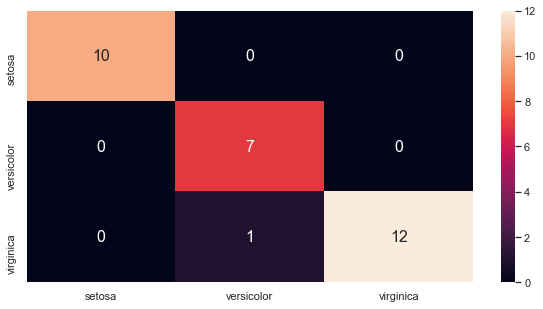

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Epoch 0 cost:  191.54641307927764
Epoch 100 cost:  51.70125097229021
Epoch 200 cost:  50.083964633975576
Epoch 300 cost:  42.55300412257264
Epoch 400 cost:  76.08507714698274
Epoch 500 cost:  2.312442282016768
Epoch 600 cost:  2.224986807502777
Epoch 700 cost:  2.1660205484919435
Epoch 800 cost:  2.121791449233127
Epoch 900 cost:  2.085811943396262
Epoch 1000 cost:  2.0540617836351966
Epoch 1100 cost:  2.024414606249327
Epoch 1200 cost:  1.9960518283650477
Epoch 1300 cost:  1.9689446305271563
Epoch 1400 cost:  1.942148330155842
Epoch 1500 cost:  1.9142880574278547
Epoch 1600 cost:  1.8845133717504876
Epoch 1700 

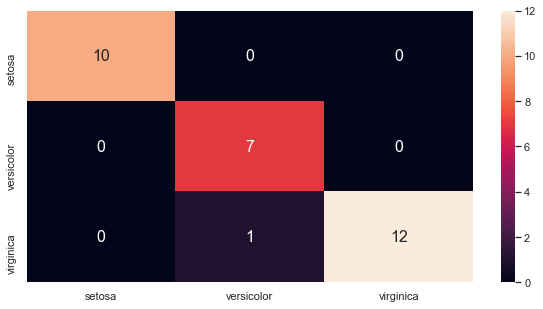

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [9]:
cost = []
lr = []
for x in range(10):
    temp = train(learning_rate = (x+1)/10)
    cost.append(temp)
    lr.append((x+1)/10)

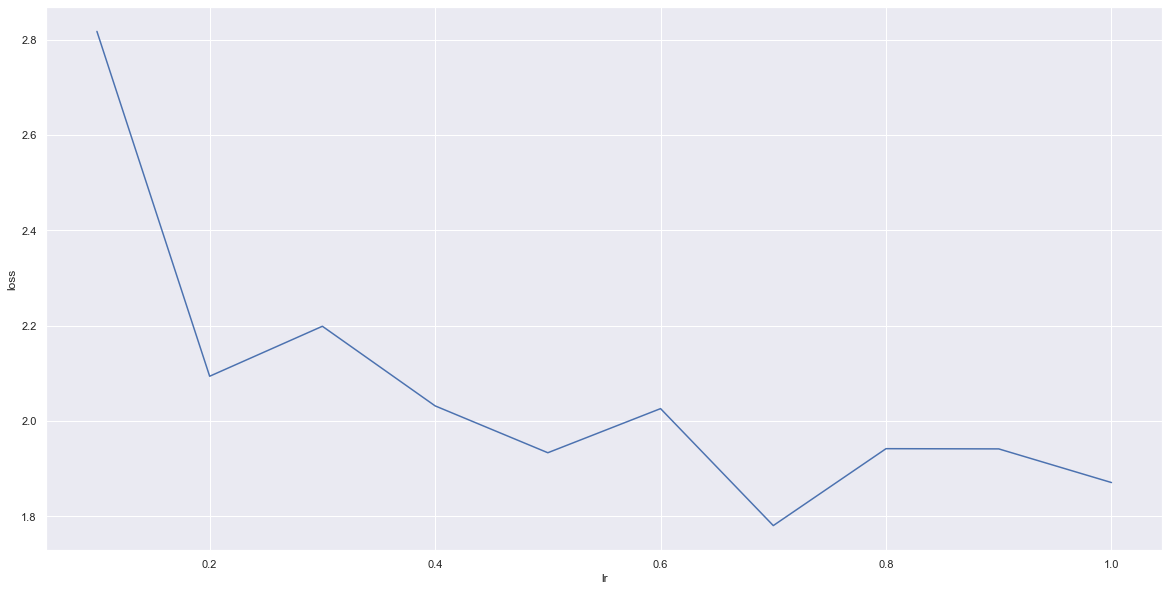

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
plt.xlabel('lr')
plt.ylabel('loss')
plt.plot(lr, cost)
plt.show()